In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
import datetime
import time
from importlib import reload
import read_stream_data_gcp_save
from matplotlib.backends.backend_pdf import PdfPages
import pandas as pd
import glob
from scipy import optimize
from scipy.optimize import minimize
import scipy.signal

In [3]:
from __future__ import unicode_literals

figsize(8,6)

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.unicode'] = True
    
rcParams['xtick.labelsize'] = 20
rcParams['xtick.major.size'] = 10
rcParams['xtick.major.width'] = 1
rcParams['xtick.major.pad'] = 10
rcParams['xtick.minor.size'] = 5
rcParams['xtick.minor.width'] = 1

rcParams['ytick.labelsize'] = 20
rcParams['ytick.major.size'] = 10
rcParams['ytick.major.width'] = 1
rcParams['ytick.major.pad'] = 10
rcParams['ytick.minor.size'] = 5
rcParams['ytick.minor.width'] = 1

rcParams['legend.fontsize'] = 12
rcParams['legend.borderaxespad'] = 2

rcParams['axes.labelsize'] = 24
rcParams['axes.titlesize'] = 24

rcParams['ytick.direction'] = 'in'
rcParams['xtick.direction'] = 'in'

C:\Users\Heather\Anaconda3\lib\site-packages\matplotlib\__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [9]:
fr = np.load('fr.npy')

In [10]:
pxx = np.load('pxx.npy')

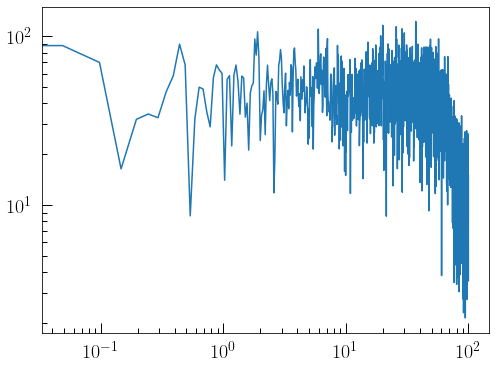

In [11]:
loglog(fr, pxx)

In [12]:
b, a = scipy.signal.butter(4, 63, analog=True, btype='low')

In [13]:
w,h = scipy.signal.freqs(b,a,worN=fr)

In [14]:
tf = np.absolute(h)**2

In [15]:
def noise_model_pysmurf(f, wl, fk, alpha):
    return (wl)*(1 + (fk/f)**alpha) *tf 

In [16]:
p0 = [50,0.01,0.1]

C:\Users\Heather\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


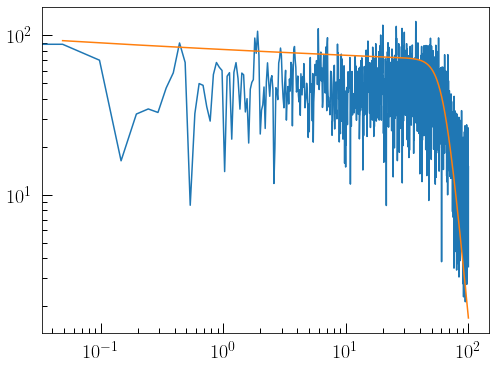

In [17]:
loglog(fr, pxx)
loglog(fr, noise_model_pysmurf(fr, 50, 0.01, 0.1))

In [18]:
bounds_low = [0.,0.,0.]
bounds_high = [np.inf,np.inf,np.inf]
bounds = (bounds_low,bounds_high)

In [19]:
popt = optimize.curve_fit(noise_model_pysmurf, fr, pxx, p0=p0,bounds=bounds)

C:\Users\Heather\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in true_divide
  


ValueError: Residuals are not finite in the initial point.